In [1]:
import numpy as np
import matplotlib.colors as col
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import pdb
import time
import progressbar
import include.simulations.useQuasi3D as sim

## electron and ion densities

<ipython-input-14-4b2106194760>:45: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  chargeElectrons = axs[0].pcolormesh(xiaxis, raxis, -1*chargeElectrons, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=0,vmax=None),cmap="OrRd")
<ipython-input-14-4b2106194760>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  chargeElectrons = axs[0].pcolormesh(xiaxis, raxis, -1*chargeElectrons, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=0,vmax=None),cmap="OrRd")
<ipython-input-14-4b2106194760>:46: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword arg

0.4880759278933207  min


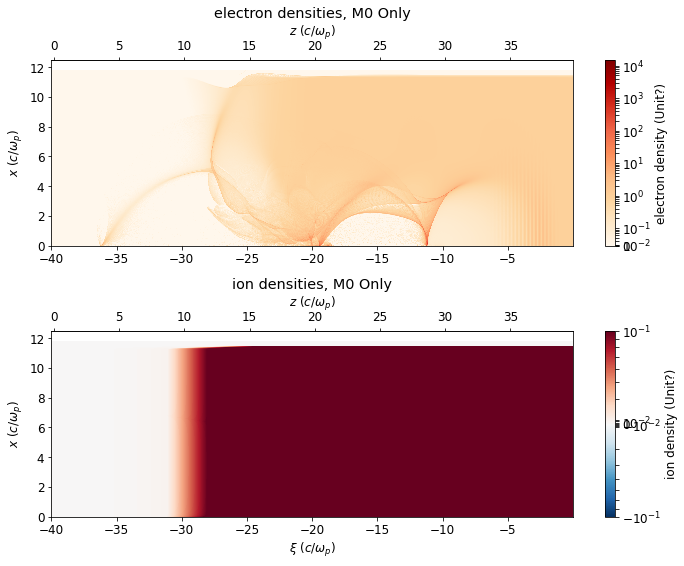

In [14]:
fname = "chargeElectrons-plot-data.npz"
data = np.load(fname)
xiaxis = data['arr_0']
raxis = data['arr_1']
chargeElectrons = data['arr_2']

fname = "chargeIons-plot-data.npz"
data = np.load(fname)
xiaxis = data['arr_0']
raxis = data['arr_1']
chargeIons = data['arr_2']

start_time = time.time()
t0 = sim.getTime()

def zaxis_func(xi):
    z = xi + t0
    return z

def xiaxis_func(z):
    xi = z - t0
    return xi

#zaxis = [xi + t0 for xi in xiaxis]

fig, axs = plt.subplots(2, figsize=(10,8))

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.9)

axs[0].set_ylim(0,12.5)
axs[1].set_ylim(0,12.5)
axs[0].set(ylabel = '$x$ ($c/\omega_p$)')
axs[1].set(xlabel = r'$\xi$ ($c/\omega_p$)', ylabel = '$x$ ($c/\omega_p$)')

secax0 = axs[0].secondary_xaxis('top', functions=(zaxis_func, xiaxis_func))
secax0.set_xlabel(r'$z$ ($c/\omega_p$)')

secax1 = axs[1].secondary_xaxis('top', functions=(zaxis_func, xiaxis_func))
secax1.set_xlabel(r'$z$ ($c/\omega_p$)')


axs[0].set_title('electron densities, M0 Only')
axs[1].set_title('ion densities, M0 Only')

chargeElectrons = axs[0].pcolormesh(xiaxis, raxis, -1*chargeElectrons, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=0,vmax=None),cmap="OrRd")
chargeIons = axs[1].pcolormesh(xiaxis, raxis, chargeIons, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-0.1,vmax=0.1),cmap="RdBu_r")

#tick_locations=[x*0.01 for x in range(2,10)]+ [x*0.01 for x in range(-10,-1)] + [x*0.1 for x in range(-10,10)] +[ x for x in range(-10,10)]
#cbar_ax = fig.add_axes([0.83, 0.05, 0.03, 0.9])

cbar1 = fig.colorbar(chargeElectrons, ax=axs[0])
cbar2 = fig.colorbar(chargeIons, ax=axs[1])

cbar1.set_label('electron density (Unit?)')
cbar2.set_label('ion density (Unit?)')

fig.tight_layout(pad=1.0)
fig.savefig("charge-densities-full.png",dpi=600,transparent=True)

print((time.time() - start_time)/60, " min")